In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Advertising.csv', index_col='Unnamed: 0')

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 4)

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
# Checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


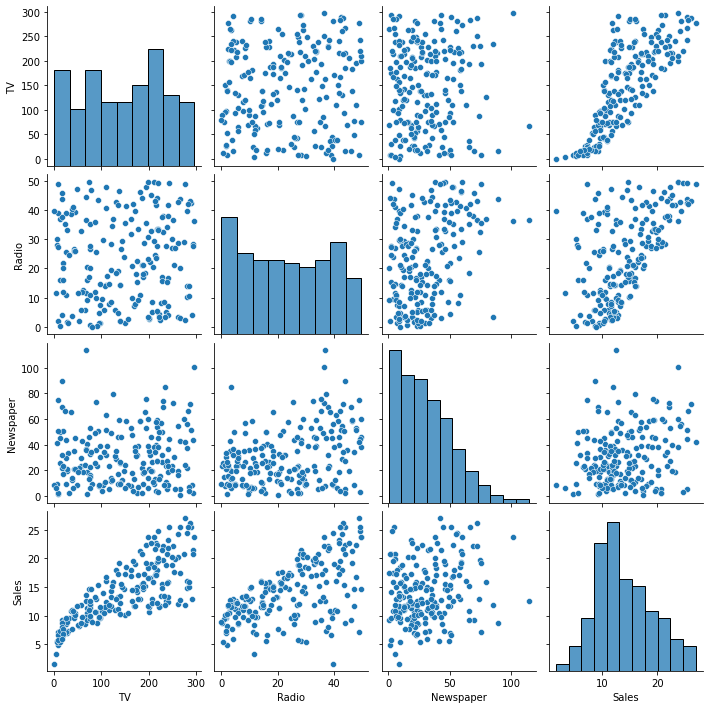

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

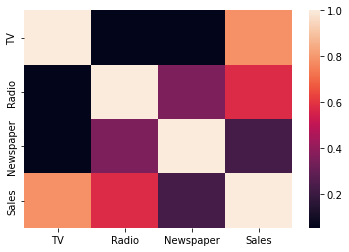

In [17]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='TV', ylabel='Sales'>

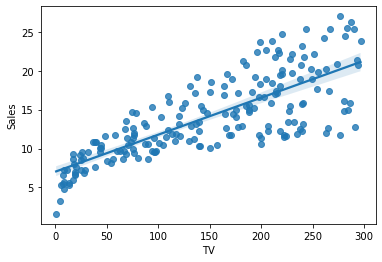

In [20]:
sns.regplot(x='TV', y='Sales', data=df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

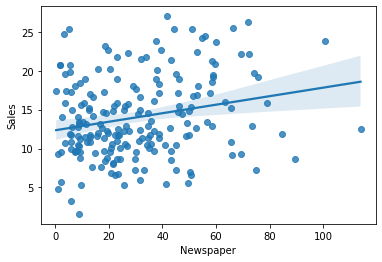

In [21]:
sns.regplot(x='Newspaper', y='Sales', data=df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

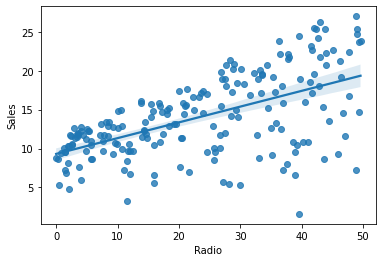

In [22]:
sns.regplot(x='Radio', y='Sales', data=df)

In [23]:
x = df.drop(['Sales'], axis=1)

In [25]:
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [26]:
y = df['Sales']

In [27]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=5, test_size=0.3)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [43]:
model.intercept_

2.9787673054549177

In [44]:
model.coef_

array([ 0.04668512,  0.18501553, -0.00153043])

In [45]:
model.rank_

3

In [54]:
model.score(x_test,y_test)

0.8868821951328664

In [55]:
y_pred = model.predict(x_test)
y_pred

array([ 6.81057871, 13.85553519, 12.19071591,  9.80746626, 15.63552195,
       10.10726578, 13.85639727, 11.69570633, 19.57289989, 10.70200132,
       18.89676557,  7.69423008, 14.96942948, 16.50998946, 21.31237989,
       20.43708495, 17.60317491, 20.54908713,  6.67087274, 11.74265195,
       10.75799527, 15.05174303, 20.54706248, 14.42570106, 19.96135224,
       21.33448159, 13.97054268, 23.35717801,  8.45514555, 20.84998043,
       15.86999695, 15.33338947, 21.80769468, 18.45552511, 12.82705009,
        9.43659316,  5.42557656, 12.08387952, 19.35734929,  8.19043934,
       12.47853095, 16.97647715, 10.73795787, 15.26797326, 16.72364603,
       12.2583435 , 15.08384655, 16.43250419, 14.33374794, 10.46257596,
       15.10826603,  7.2191011 , 14.15164628, 16.49287732, 15.23547114,
        8.94344031,  7.58659069, 17.89584427, 22.99403868, 12.87971019])

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
mean_absolute_error(y_test, y_pred)

1.2162256013390467

In [61]:
mean_squared_error(y_test, y_pred)

2.504406518845738

In [62]:
r2_score(y_test, y_pred)

0.8868821951328664

In [66]:
model.predict([[30, 20, 10]])

array([8.06432739])